## You're here! 
Welcome to your first competition in the [ITI's AI Pro training program](https://ai.iti.gov.eg/epita/ai-engineer/)! We hope you enjoy and learn as much as we did prepairing this competition.


## Introduction

In the competition, it's required to predict the `Severity` of a car crash given info about the crash, e.g., location.

This is the getting started notebook. Things are kept simple so that it's easier to understand the steps and modify it.

Feel free to `Fork` this notebook and share it with your modifications **OR** use it to create your submissions.

### Prerequisites
You should know how to use python and a little bit of Machine Learning. You can apply the techniques you learned in the training program and submit the new solutions! 

### Checklist
You can participate in this competition the way you perefer. However, I recommend following these steps if this is your first time joining a competition on Kaggle.

* Fork this notebook and run the cells in order.
* Submit this solution.
* Make changes to the data processing step as you see fit.
* Submit the new solutions.

*You can submit up to 5 submissions per day. You can select only one of the submission you make to be considered in the final ranking.*


Don't hesitate to leave a comment or contact me if you have any question!

## Import the libraries

We'll use `pandas` to load and manipulate the data. Other libraries will be imported in the relevant sections.

In [1]:
import pandas as pd
import os
import seaborn as sb
import xml.etree.ElementTree as Xet
import matplotlib.pyplot as plt
%matplotlib inline

## Exploratory Data Analysis
In this step, one should load the data and analyze it. However, I'll load the data and do minimal analysis. You are encouraged to do thorough analysis!

Let's load the data using `pandas` and have a look at the generated `DataFrame`.

In [2]:
dataset_path = '/kaggle/input/car-crashes-severity-prediction/'

df = pd.read_csv(os.path.join(dataset_path, 'train.csv'))

print("The shape of the dataset is {}.\n\n".format(df.shape))

df.head()

NameError: name 'pd' is not defined

We've got 6407 examples in the dataset with 14 featues, 1 ID, and the `Severity` of the crash.

By looking at the features and a sample from the data, the features look of numerical and catogerical types. What about some descriptive statistics?

In [3]:
df.drop(columns='ID').describe()

,Lat,Lng,Distance(mi),Severity
count,6407.000000,6407.000000,6407.000000,6407.000000
mean,37.765653,-122.405990,0.135189,2.293429
std,0.032555,0.028275,0.396360,0.521225
min,37.609619,-122.510440,0.000000,1.000000
25%,37.737096,-122.412210,0.000000,2.000000
50%,37.768238,-122.404835,0.000000,2.000000
75%,37.787813,-122.392477,0.041000,3.000000
max,37.825626,-122.349734,6.820000,4.000000


In [4]:
print(" Number of null records in each column" , df.isnull().sum())  # check weather there exist bnulls or not
print("Number of Duplicated records",df.duplicated().sum()) # check the existance of duplicated rows or not 

 Number of null records in each column ID              0
Lat             0
Lng             0
Bump            0
Distance(mi)    0
Crossing        0
Give_Way        0
Junction        0
No_Exit         0
Railway         0
Roundabout      0
Stop            0
Amenity         0
Side            0
Severity        0
timestamp       0
dtype: int64
Number of Duplicated records 0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6407 entries, 0 to 6406
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6407 non-null   int64  
 1   Lat           6407 non-null   float64
 2   Lng           6407 non-null   float64
 3   Bump          6407 non-null   bool   
 4   Distance(mi)  6407 non-null   float64
 5   Crossing      6407 non-null   bool   
 6   Give_Way      6407 non-null   bool   
 7   Junction      6407 non-null   bool   
 8   No_Exit       6407 non-null   bool   
 9   Railway       6407 non-null   bool   
 10  Roundabout    6407 non-null   bool   
 11  Stop          6407 non-null   bool   
 12  Amenity       6407 non-null   bool   
 13  Side          6407 non-null   object 
 14  Severity      6407 non-null   int64  
 15  timestamp     6407 non-null   object 
dtypes: bool(9), float64(3), int64(2), object(2)
memory usage: 406.8+ KB


In [6]:
# conversion to timestamp
df.timestamp = pd.to_datetime(df.timestamp, utc = True)

# comversion to 1 and 0 
columns = ['Crossing' , 'Junction' , 'Railway' , 'Roundabout' , 'Amenity']
df[columns] = df[columns].astype(int)

# checking the conversion
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6407 entries, 0 to 6406
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   ID            6407 non-null   int64              
 1   Lat           6407 non-null   float64            
 2   Lng           6407 non-null   float64            
 3   Bump          6407 non-null   bool               
 4   Distance(mi)  6407 non-null   float64            
 5   Crossing      6407 non-null   int64              
 6   Give_Way      6407 non-null   bool               
 7   Junction      6407 non-null   int64              
 8   No_Exit       6407 non-null   bool               
 9   Railway       6407 non-null   int64              
 10  Roundabout    6407 non-null   int64              
 11  Stop          6407 non-null   bool               
 12  Amenity       6407 non-null   int64              
 13  Side          6407 non-null   object             
 14  Severity

In [7]:
df['Side'] = df['Side'].replace(['R','L'],[0,1])
df.head(20)

,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,Severity,timestamp
0,0,37.762150,-122.405660,False,0.044,0,False,0,False,0,0,False,1,0,2,2016-03-25 15:13:02+00:00
1,1,37.719157,-122.448254,False,0.000,0,False,0,False,0,0,False,0,0,2,2020-05-05 19:23:00+00:00
2,2,37.808498,-122.366852,False,0.000,0,False,0,False,0,0,True,0,0,3,2016-09-16 19:57:16+00:00
3,3,37.785930,-122.391080,False,0.009,0,False,1,False,0,0,False,0,0,1,2020-03-29 19:48:43+00:00
4,4,37.719141,-122.448457,False,0.000,0,False,0,False,0,0,False,0,0,2,2019-10-09 08:47:00+00:00
5,5,37.769611,-122.416878,False,0.000,0,False,0,False,0,0,False,0,0,2,2019-09-22 08:45:38+00:00
6,6,37.727318,-122.402756,False,0.000,0,False,0,False,0,0,False,0,0,2,2019-10-23 07:11:42+00:00
7,7,37.731277,-122.435219,False,0.010,0,False,0,False,0,0,False,0,0,3,2016-03-25 13:36:15+00:00
8,8,37.787867,-122.396836,False,0.000,1,False,0,False,0,0,False,1,1,2,2020-02-23 18:38:00+00:00
9,9,37.756806,-122.403612,False,0.000,0,False,0,False,0,0,False,0,0,2,2019-09-25 18:07:00+00:00


In [1]:
# spliiting the Timestamp column as preparation for merging the data with weather data

df['Year'] = df.timestamp.dt.year
df['Month'] = df.timestamp.dt.month
df['Day'] = df.timestamp.dt.day
df['weekday'] = df.timestamp.dt.weekday


# checking the splitiing step
df.info()

NameError: name 'df' is not defined

Text(0, 0.5, 'Count')

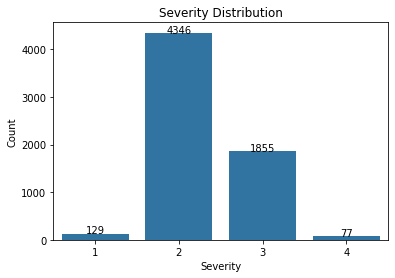

In [9]:
# check the spreading of Data accross Severity 
data = df.groupby("Severity").ID.count()
data = pd.DataFrame(data).reset_index()
g = sb.barplot(data = data ,y = "ID", x = "Severity" , color = sb.color_palette()[0])
for index, row in data.iterrows():
    g.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
    
plt.title("Severity Distribution")
plt.xlabel("Severity")
plt.ylabel("Count")

In [10]:
cols = ["date", "holiday"]
rows = []
xmlparse = Xet.parse(os.path.join(dataset_path, 'holidays.xml'))
root = xmlparse.getroot()
for i in root:
    date = i.find("date").text
    description = i.find("description").text
    
    rows.append({"date": date,
                 "holiday": description})

holidayDF = pd.DataFrame(rows, columns=cols)
print(holidayDF.shape)
holidayDF.info()


(90, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     90 non-null     object
 1   holiday  90 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB


In [11]:
# conversion of date from object format to datetime
holidayDF['timestamp'] = pd.to_datetime(holidayDF.date,utc = True)
holidayDF['timestamp'] = holidayDF.timestamp.dt.date
df['timestamp'] = df.timestamp.dt.date
holidayDF.drop(["date"], axis=1, inplace=True)

holidayDF.head()


,holiday,timestamp
0,New Year Day,2012-01-02
1,Martin Luther King Jr. Day,2012-01-16
2,Presidents Day (Washingtons Birthday),2012-02-20
3,Memorial Day,2012-05-28
4,Independence Day,2012-07-04


In [12]:
# merging the holiday conditon to data
import numpy as np
holidayMergedDF = pd.merge(df,holidayDF,how = 'left' ,on = ['timestamp'])
holidayMergedDF['holiday'] = holidayMergedDF['holiday'] * 0
holidayMergedDF['holiday'] = holidayMergedDF['holiday'].replace([np.NaN,''],[0,1])
print(holidayMergedDF.shape)
holidayMergedDF.isnull().sum()

(6407, 21)


ID              0
Lat             0
Lng             0
Bump            0
Distance(mi)    0
Crossing        0
Give_Way        0
Junction        0
No_Exit         0
Railway         0
Roundabout      0
Stop            0
Amenity         0
Side            0
Severity        0
timestamp       0
Year            0
Month           0
Day             0
Hour            0
holiday         0
dtype: int64

In [13]:
# loading the second dataFrame (weather Condition)
weatherDF = pd.read_csv(os.path.join(dataset_path, 'weather-sfcsv.csv'))

print("The shape of the dataset is {}.\n\n".format(weatherDF.shape))

weatherDF.head()

The shape of the dataset is (6901, 12).




,Year,Day,Month,Hour,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected
0,2020,27,7,18,Fair,64.0,0.0,64.0,70.0,20.0,10.0,No
1,2017,30,9,17,Partly Cloudy,NaN,NaN,71.1,57.0,9.2,10.0,No
2,2017,27,6,5,Overcast,NaN,NaN,57.9,87.0,15.0,9.0,No
3,2016,7,9,9,Clear,NaN,NaN,66.9,73.0,4.6,10.0,No
4,2019,19,10,2,Fair,52.0,0.0,52.0,89.0,0.0,9.0,No


In [14]:
# cleaning Data
print(weatherDF.isnull().sum())
weatherDF['Weather_Condition'] = weatherDF['Weather_Condition'].astype('category').cat.codes
weatherDF.drop(["Precipitation(in)","Wind_Chill(F)"], axis=1, inplace=True)
# weatherDF['Humidity(%)'].fillna((weatherDF['Humidity(%)'].mean()), inplace=True)
# weatherDF['Weather_Condition'].fillna((weatherDF['Weather_Condition'].mode()), inplace=True)
# weatherDF['Temperature(F)'].fillna((weatherDF['Temperature(F)'].mean()), inplace=True)
# weatherDF['Visibility(mi)'].fillna((weatherDF['Visibility(mi)'].mean()), inplace=True)
weatherDF.dropna(subset=['Humidity(%)','Weather_Condition','Temperature(F)','Visibility(mi)'],inplace = True)
weatherDF['Wind_Speed(mph)'].fillna((weatherDF['Wind_Speed(mph)'].mean()), inplace=True)
print(weatherDF.isnull().sum())

Year                    0
Day                     0
Month                   0
Hour                    0
Weather_Condition       1
Wind_Chill(F)        3609
Precipitation(in)    3327
Temperature(F)          2
Humidity(%)             2
Wind_Speed(mph)       345
Visibility(mi)          1
Selected                0
dtype: int64
Year                 0
Day                  0
Month                0
Hour                 0
Weather_Condition    0
Temperature(F)       0
Humidity(%)          0
Wind_Speed(mph)      0
Visibility(mi)       0
Selected             0
dtype: int64


In [15]:
# cleaning of data
print(weatherDF.shape)
uniqueWeatherDF  = weatherDF.drop_duplicates(['Year','Hour', 'Day' ,'Month'],keep = 'last', inplace = False)
print("shape after removing duplicated relative to Hour , Day, Month and Year ",uniqueWeatherDF.shape)


# for cl in uniqueWeatherDF.select_dtypes(include=['object']):
#     uniqueWeatherDF[cl],_ = pd.factorize(uniqueWeatherDF[cl])

(6899, 10)
shape after removing duplicated relative to Hour , Day, Month and Year  (5970, 10)


The output shows desciptive statistics for the numerical features, `Lat`, `Lng`, `Distance(mi)`, and `Severity`. I'll use the numerical features to demonstrate how to train the model and make submissions. **However you shouldn't use the numerical features only to make the final submission if you want to make it to the top of the leaderboard.**

In [16]:
# merging the weather conditon to data
weatherMergedDF = pd.merge(holidayMergedDF,uniqueWeatherDF,how = 'left' ,on = ['Hour' ,'Year', 'Day' ,'Month'])
print(weatherMergedDF.shape)
weatherMergedDF.dropna(inplace = True)
print(weatherMergedDF.shape)

(6407, 27)
(6405, 27)


In [17]:
# removing some nonImportant columns 
df = weatherMergedDF.drop(columns=['Bump', 'Give_Way','No_Exit','Selected','Roundabout'])
print(df.shape)
df.info()


(6405, 22)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6405 entries, 0 to 6406
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 6405 non-null   int64  
 1   Lat                6405 non-null   float64
 2   Lng                6405 non-null   float64
 3   Distance(mi)       6405 non-null   float64
 4   Crossing           6405 non-null   int64  
 5   Junction           6405 non-null   int64  
 6   Railway            6405 non-null   int64  
 7   Stop               6405 non-null   bool   
 8   Amenity            6405 non-null   int64  
 9   Side               6405 non-null   int64  
 10  Severity           6405 non-null   int64  
 11  timestamp          6405 non-null   object 
 12  Year               6405 non-null   int64  
 13  Month              6405 non-null   int64  
 14  Day                6405 non-null   int64  
 15  Hour               6405 non-null   int64  
 16  holiday      

In [18]:
df['RushHour'] = ((df['Hour'] > 14) & (df['Hour'] < 23)).astype(int)
df.RushHour.mean()

0.4213895394223263

In [19]:
colors = []
for index, row in df.iterrows():
    if row["Severity"] == 1 :
        colors.append("green")
    elif row["Severity"] == 2 :
        colors.append("blue")
    elif row["Severity"] == 3 :
        colors.append("red")
    else: #4
        colors.append("black")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


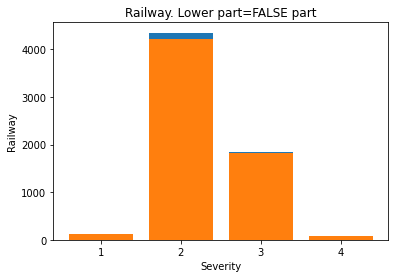

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


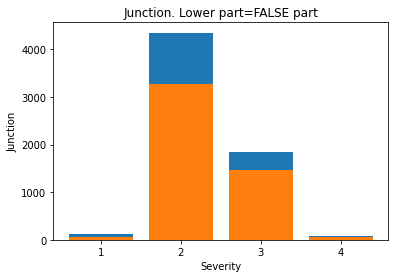

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


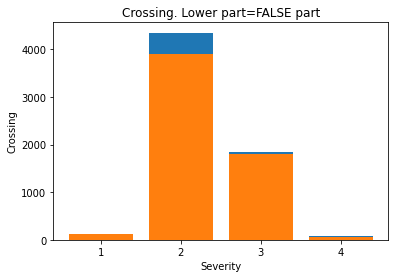

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


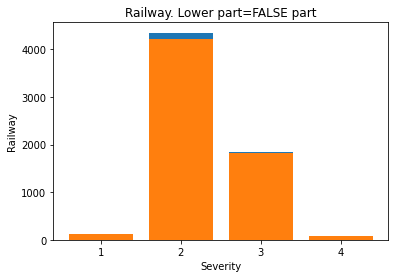

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


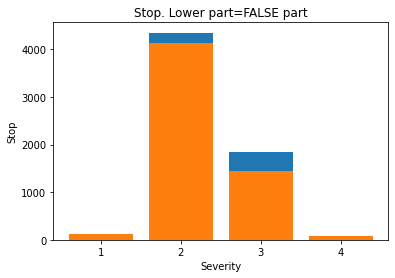

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


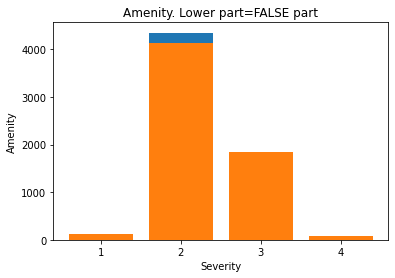

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


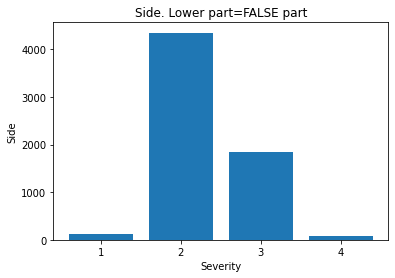

In [20]:
def BooleanAttributeVisualisation(attributeName,false = False):
    x = np.array(["1", "2", "3", "4"])
    
    y = np.array([len(df[df["Severity"]==i]) for i in range(1,5)])
    plt.bar(x,y)
    
    y = np.array([len(df[df["Severity"]==i][df[attributeName]==false]) for i in range(1,5)])
    plt.bar(x,y)
    
    plt.title('{}. Lower part=FALSE part'.format(attributeName))
    plt.xlabel("Severity")
    plt.ylabel(attributeName)
    plt.show()
BooleanAttributeVisualisation("Railway")
BooleanAttributeVisualisation("Junction")
BooleanAttributeVisualisation("Crossing")
BooleanAttributeVisualisation("Railway")
BooleanAttributeVisualisation("Stop")
BooleanAttributeVisualisation("Amenity")
BooleanAttributeVisualisation("Side",false= 'R')

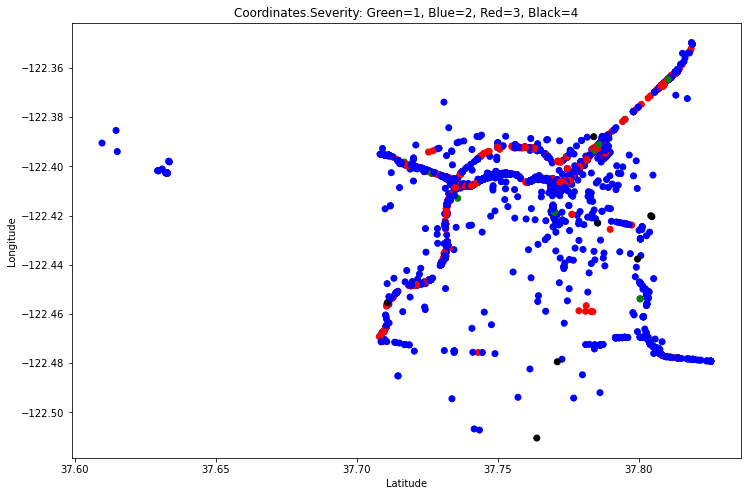

In [21]:
#PLOT Coordinates
fig = plt.figure(figsize=(12,8))
plt.scatter(df[['Lat']],df[['Lng']],color=colors)
plt.title("Coordinates.Severity: Green=1, Blue=2, Red=3, Black=4")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

<AxesSubplot:>

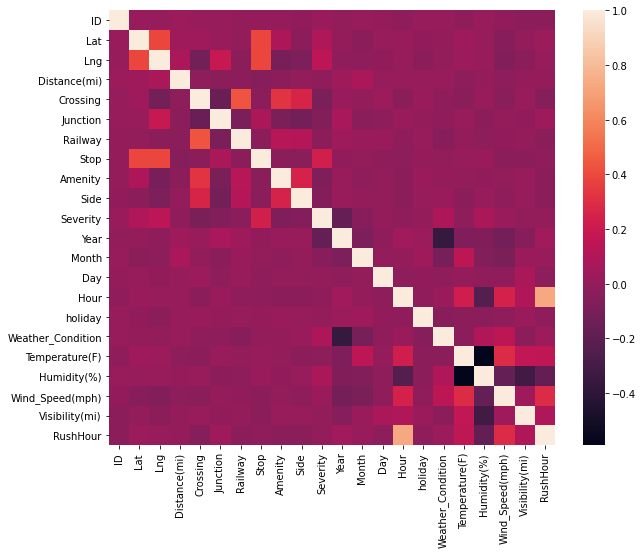

In [22]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr())

In [23]:
#ordered correlated attributes with Severity
(abs(df.corr()[['Severity']])).sort_values(by='Severity',ascending=False)

,Severity
Severity,1.000000
Stop,0.229478
Year,0.171589
Lng,0.145689
Lat,0.100113
Weather_Condition,0.092530
Crossing,0.090214
Humidity(%),0.079902
Amenity,0.078854
Junction,0.068614


In [24]:
# exploring weather incidents may occur in night more than morning
(len(df[df['Hour'] > 14])+ len(df[df['Hour'] < 18]))/ len(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6405 entries, 0 to 6406
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 6405 non-null   int64  
 1   Lat                6405 non-null   float64
 2   Lng                6405 non-null   float64
 3   Distance(mi)       6405 non-null   float64
 4   Crossing           6405 non-null   int64  
 5   Junction           6405 non-null   int64  
 6   Railway            6405 non-null   int64  
 7   Stop               6405 non-null   bool   
 8   Amenity            6405 non-null   int64  
 9   Side               6405 non-null   int64  
 10  Severity           6405 non-null   int64  
 11  timestamp          6405 non-null   object 
 12  Year               6405 non-null   int64  
 13  Month              6405 non-null   int64  
 14  Day                6405 non-null   int64  
 15  Hour               6405 non-null   int64  
 16  holiday            6405 

## Data Splitting

Now it's time to split the dataset for the training step. Typically the dataset is split into 3 subsets, namely, the training, validation and test sets. In our case, the test set is already predefined. So we'll split the "training" set into training and validation sets with 0.8:0.2 ratio. 

*Note: a good way to generate reproducible results is to set the seed to the algorithms that depends on randomization. This is done with the argument `random_state` in the following command* 

In [25]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42) # Try adding `stratify` here

X_train = train_df.drop(columns=['ID', 'Severity'])
y_train = train_df['Severity']

X_val = val_df.drop(columns=['ID', 'Severity'])
y_val = val_df['Severity']

As pointed out eariler, I'll use the numerical features to train the classifier. **However, you shouldn't use the numerical features only to make the final submission if you want to make it to the top of the leaderboard.** 

In [26]:
# This cell is used to select the numerical features. IT SHOULD BE REMOVED AS YOU DO YOUR WORK.
X_train = X_train[['Lat', 'Lng','Distance(mi)','Crossing','Month','Year','Day','Stop','Side','Temperature(F)', 'Humidity(%)','Wind_Speed(mph)','Weather_Condition','holiday','RushHour']]
X_val = X_val[['Lat', 'Lng','Distance(mi)','Crossing','Month','Year','Day','Stop','Side','Temperature(F)', 'Humidity(%)','Wind_Speed(mph)','Weather_Condition','holiday','RushHour']]

## Model Training

Let's train a model with the data! We'll train a Random Forest Classifier to demonstrate the process of making submissions. 

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)

# Train the classifier/
classifier = classifier.fit(X_train, y_train)

Now let's test our classifier on the validation dataset and see the accuracy.

In [28]:
print("The accuracy of the classifier on the validation set is ", (classifier.score(X_val, y_val)))

The accuracy of the classifier on the validation set is  0.7704918032786885


Well. That's a good start, right? A classifier that predicts all examples' `Severity` as 2 will get around 0.63. You should get better score as you add more features and do better data preprocessing.

## Submission File Generation

We have built a model and we'd like to submit our predictions on the test set! In order to do that, we'll load the test set, predict the class and save the submission file. 

First, we'll load the data.

In [29]:
test_df = pd.read_csv(os.path.join(dataset_path, 'test.csv'))
test_df.head()

,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,timestamp
0,6407,37.786060,-122.390900,False,0.039,False,False,True,False,False,False,False,False,R,2016-04-04 19:20:31
1,6408,37.769609,-122.415057,False,0.202,False,False,False,False,False,False,False,False,R,2020-10-28 11:51:00
2,6409,37.807495,-122.476021,False,0.000,False,False,False,False,False,False,False,False,R,2019-09-09 07:36:45
3,6410,37.761818,-122.405869,False,0.000,False,False,True,False,False,False,False,False,R,2019-08-06 15:46:25
4,6411,37.732350,-122.414100,False,0.670,False,False,False,False,False,False,False,False,R,2018-10-17 09:54:58


Note that the test set has the same features and doesn't have the `Severity` column.
At this stage one must **NOT** forget to apply the same processing done on the training set on the features of the test set.

Now we'll add `Severity` column to the test `DataFrame` and add the values of the predicted class to it.

**I'll select the numerical features here as I did in the training set. DO NOT forget to change this step as you change the preprocessing of the training data.**

In [30]:
# applying the preprossing like the data
test_df.timestamp = pd.to_datetime(test_df.timestamp, utc = True)

test_df['Year'] = test_df.timestamp.dt.year
test_df['Month'] = test_df.timestamp.dt.month
test_df['Day'] = test_df.timestamp.dt.day
test_df['Hour'] = test_df.timestamp.dt.hour

test_df.timestamp = test_df.timestamp.dt.date
columns = ['Crossing' , 'Junction' , 'Railway' , 'Roundabout' , 'Amenity']
test_df[columns] = test_df[columns].astype(int)

test_df['Side'] = test_df['Side'].replace(['R','L'],[0,1])


holidayMergedTestDF = pd.merge(test_df,holidayDF,how = 'left' ,on = ['timestamp'])

test_df = pd.merge(holidayMergedTestDF,uniqueWeatherDF,how = 'left' ,on = ['Hour' ,'Year', 'Day' ,'Month'])

test_df['holiday'] = test_df['holiday'] * 0
test_df['holiday'] = test_df['holiday'].replace([np.NaN,''],[0,1])
print(test_df.isnull().sum())
test_df['RushHour'] = ((test_df['Hour'] > 14) & (test_df['Hour'] < 23)).astype(int)

ID                   0
Lat                  0
Lng                  0
Bump                 0
Distance(mi)         0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Stop                 0
Amenity              0
Side                 0
timestamp            0
Year                 0
Month                0
Day                  0
Hour                 0
holiday              0
Weather_Condition    0
Temperature(F)       0
Humidity(%)          0
Wind_Speed(mph)      0
Visibility(mi)       0
Selected             0
dtype: int64


In [31]:
X_test = test_df.drop(columns=['ID'])
X_test = X_test[['Lat', 'Lng','Distance(mi)','Crossing','Month','Year','Day','Stop','Side','Temperature(F)', 'Humidity(%)','Wind_Speed(mph)','Weather_Condition','holiday','RushHour']]
y_test_predicted = classifier.predict(X_test)

test_df['Severity'] = y_test_predicted

test_df.head()

,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,...,Hour,holiday,Weather_Condition,Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected,RushHour,Severity
0,6407,37.786060,-122.390900,False,0.039,0,False,1,False,0,...,19,0,17,63.0,60.0,10.4,10.0,No,1,2
1,6408,37.769609,-122.415057,False,0.202,0,False,0,False,0,...,11,0,3,65.0,56.0,5.0,9.0,No,0,2
2,6409,37.807495,-122.476021,False,0.000,0,False,0,False,0,...,7,0,14,59.0,87.0,14.0,10.0,No,0,2
3,6410,37.761818,-122.405869,False,0.000,0,False,1,False,0,...,15,0,3,72.0,59.0,17.0,10.0,No,1,2
4,6411,37.732350,-122.414100,False,0.670,0,False,0,False,0,...,9,0,22,57.0,77.0,5.8,10.0,No,0,2


Now we're ready to generate the submission file. The submission file needs the columns `ID` and `Severity` only.

In [32]:
test_df[['ID', 'Severity']].to_csv('/kaggle/working/submission.csv', index=False)

The remaining steps is to submit the generated file and are as follows. 

1. Press `Save Version` on the upper right corner of this notebook.
2. Write a `Version Name` of your choice and choose `Save & Run All (Commit)` then click `Save`.
3. Wait for the saved notebook to finish running the go to the saved notebook.
4. Scroll down until you see the output files then select the `submission.csv` file and click `Submit`.

Now your submission will be evaluated and your score will be updated on the leaderboard! CONGRATULATIONS!!

## Conclusion

In this notebook, we have demonstrated the essential steps that one should do in order to get "slightly" familiar with the data and the submission process. We chose not to go into details in each step to keep the welcoming notebook simple and make a room for improvement.

You're encourged to `Fork` the notebook, edit it, add your insights and use it to create your submission.